Датасет с фотографиями сухих бобов разных видов:
* `Area` – площадь бобовой зоны и количество пикселей в пределах ее границ;
* `Perimeter` – длина границы боба;
* `MajorAxisLength` – расстояние между концами самой длинной линии, которую можно провести от боба;
* `MinorAxisLength` – самая длинная линия, которую можно провести от боба, стоя перпендикулярно главной оси;
* `AspectRatio` – соотношение между длиной главной оси и длиной малой оси;
* `Eccentricity` – эксцентриситет эллипса, имеющий те же моменты, что и область;
* `ConvexArea` – кол-во пикселей в наименьшем выпуклом многоугольнике, который может содержать площадь зернышка фасоли;
* `EquivDiameter` – эквивалентный диаметр: диаметр круга, площадь которого равна площади семян фасоли;
* `Extent` – отношение пикселей в ограничивающем прямоугольнике к области фасоли;
* `Solidity` – выпуклость, отношение пикселей в выпуклой оболочке к пикселям в зернах.


In [ ]:
pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn import metrics
# for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
# for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, decomposition
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
dry_beans = fetch_ucirepo(id=602)

X = dry_beans.data.features
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [ ]:
vals = dry_beans.data.targets['Class'].unique()  # Массив значений целевой переменной
vals

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
dry_beans.data.targets['Class'].value_counts()

,count
Class,
DERMASON,3546
SIRA,2636
SEKER,2027
HOROZ,1928
CALI,1630
BARBUNYA,1322
BOMBAY,522


In [ ]:
cols_for_clusters = list(X.columns) #['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRatio', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'Roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
df = X[cols_for_clusters] # копия датасета с исходным набором данных
y = dry_beans.data.targets['Class'].replace(vals, [0, 1, 2, 3, 4, 5, 6])
yvals = dry_beans.data.targets['Class']
dataset = X.copy()
dataset['class'] = dry_beans.data.targets['Class']

<ipython-input-7-5c50d281a71c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = dry_beans.data.targets['Class'].replace(vals, [0, 1, 2, 3, 4, 5, 6])


#K-Means

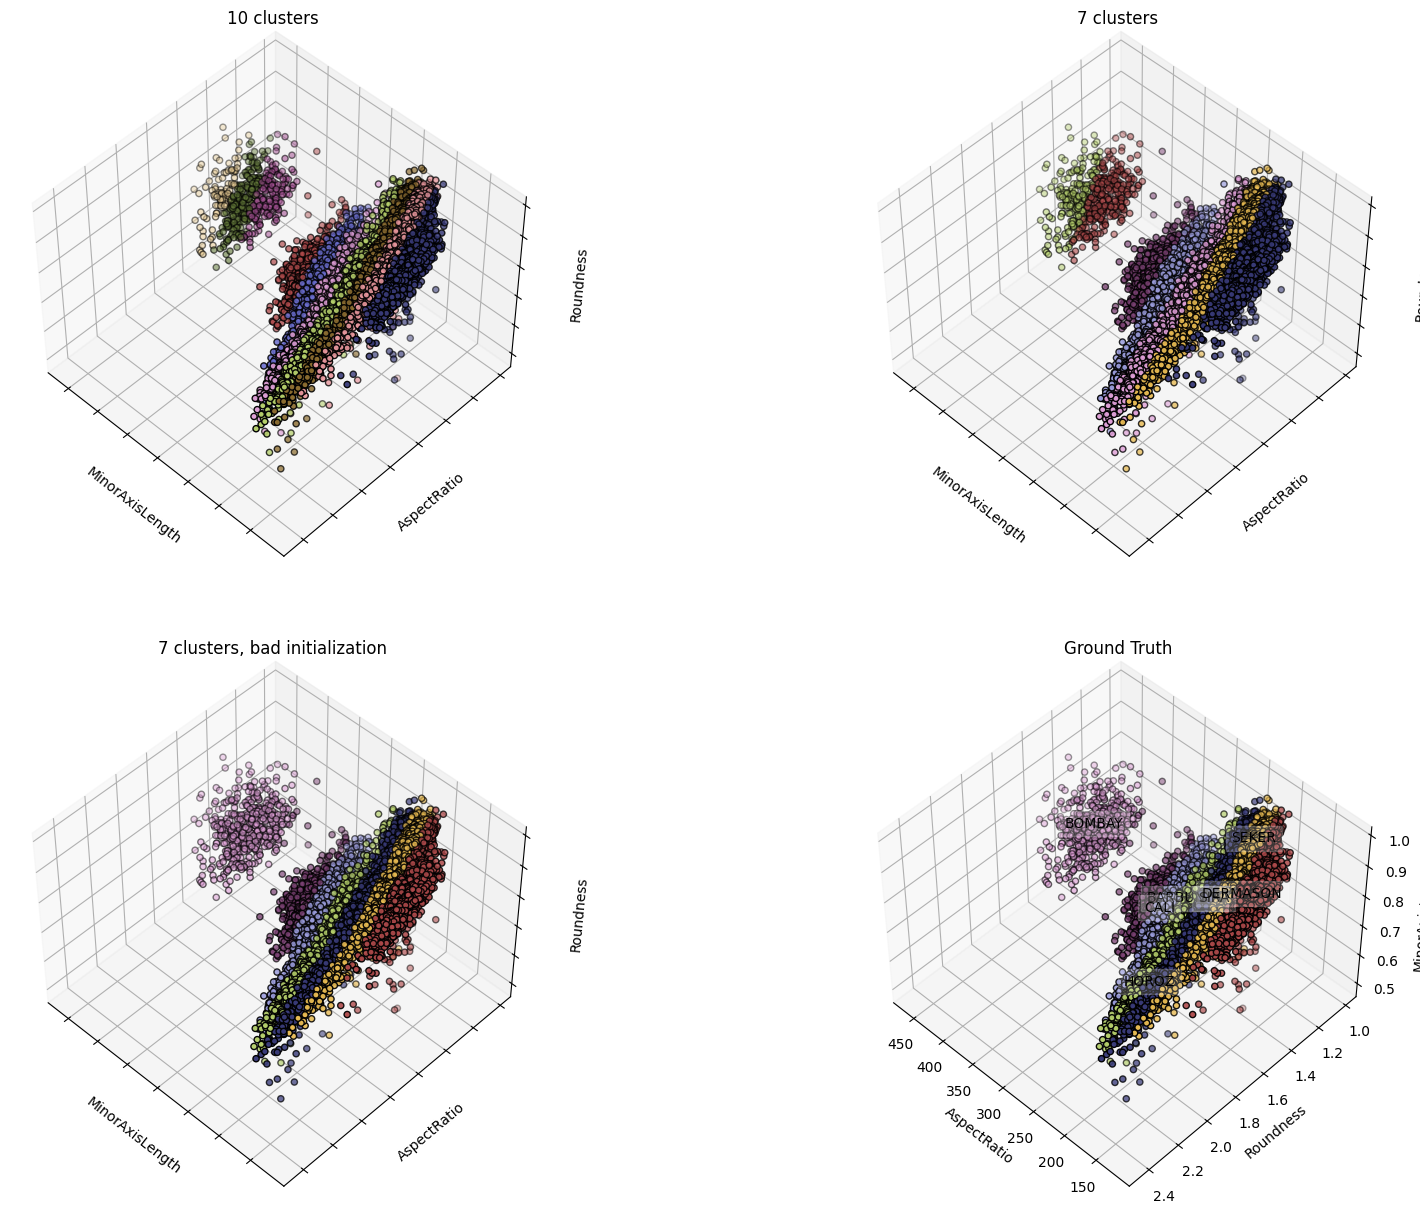

In [ ]:
estimators = [
    ('k_means_dry_beans_10', KMeans(n_clusters=10)),
    ('k_means_dry_beans_7', KMeans(n_clusters=7)),
    ('k_means_dry_beans_bad_init', KMeans(n_clusters=7, n_init=1, init='random')),
]

fig = plt.figure(figsize=(20, 15))
titles = ['10 clusters', '7 clusters', '7 clusters, bad initialization']
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection='3d', elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X['MinorAxisLength'], X['AspectRatio'], X['Roundness'], c=labels.astype(float), edgecolor='k', cmap='tab20b')

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel('MinorAxisLength')
    ax.set_ylabel('AspectRatio')
    ax.set_zlabel('Roundness')
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection='3d', elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1), (vals[2], 2), (vals[3], 3), (vals[4], 4), (vals[5], 5), (vals[6], 6)]:
    ds = dataset[dataset['class']==name]
    ax.text3D(
        ds['MinorAxisLength'].mean(), ds['AspectRatio'].mean(), ds['Roundness'].mean(),
        name, horizontalalignment='center', bbox=dict(alpha=0.2, edgecolor='w', facecolor='w'),
    )

ax.scatter(X['MinorAxisLength'], X['AspectRatio'], X['Roundness'], c=labels.astype(float), edgecolor='k', cmap='tab20b')
ax.set_xlabel('AspectRatio')
ax.set_ylabel('Roundness')
ax.set_zlabel('MinorAxisLength')
ax.set_title('Ground Truth')

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

Данные хорошо отделяются в группы, не перемешиваются.

#Метрики

In [ ]:
n_clusters = np.arange(2, 21)
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []

for n in n_clusters:
    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)

    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

print(best_metric)

[5, 0.5432592162476584, 0.4202478841405233, array([[4.51300771e+04, 8.03550922e+02, 3.01866515e+02, 1.92119775e+02,
        1.58697221e+00, 7.48976887e-01, 4.56770492e+04, 2.39475785e+02,
        7.45490402e-01, 9.88101469e-01, 8.80524078e-01, 8.00157864e-01,
        6.69166054e-03, 1.72553882e-03, 6.44543988e-01, 9.95609174e-01],
       [1.73798960e+05, 1.58732354e+03, 5.93973652e+02, 3.74562013e+02,
        1.58699096e+00, 7.71189135e-01, 1.76132775e+05, 4.69400922e+02,
        7.76680437e-01, 9.86889505e-01, 8.64223305e-01, 7.92205212e-01,
        3.44012710e-03, 8.41638108e-04, 6.28505044e-01, 9.91818714e-01],
       [7.95738138e+04, 1.10031386e+03, 4.13616275e+02, 2.46883709e+02,
        1.68125732e+00, 7.97348563e-01, 8.08446615e+04, 3.17986967e+02,
        7.55435597e-01, 9.84284550e-01, 8.25928794e-01, 7.70403192e-01,
        5.21715100e-03, 1.13897231e-03, 5.94751072e-01, 9.92130568e-01],
       [6.18233713e+04, 9.78377391e+02, 3.76107519e+02, 2.11476962e+02,
        1.7993944

Оптимальное кол-во кластеров 5

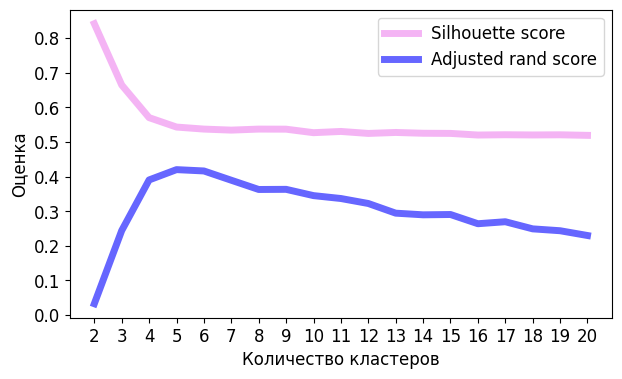

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(n_clusters, silhouette_score_values, linewidth=best_metric[0], label='Silhouette score', color='violet', alpha=0.6)
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=best_metric[0], label='Adjusted rand score', color='blue', alpha=0.6)
plt.xlabel('Количество кластеров', size=12)
plt.ylabel('Оценка', size=12)
plt.xticks(n_clusters, size=12)
plt.yticks(size=12)
plt.legend(loc='best', fontsize=12)
plt.show()

#silhouette оценка около 1 означает, что точка данных i очень компактна в пределах кластера, к которому она принадлежит, и удалена от других кластеров.
#Худшее значение — -1.
#Значения, близкие к 0, обозначают перекрывающиеся кластеры.
# adjusted_rand_score больше 0,9 означает отличное кластерное восстановление, а выше 0,8 — хорошее восстановление.
#Менее 0,5 считается плохим восстановлением.

Лучшее число кластеров 5, при увеличении качество падает.

#Иерархическая кластеризация

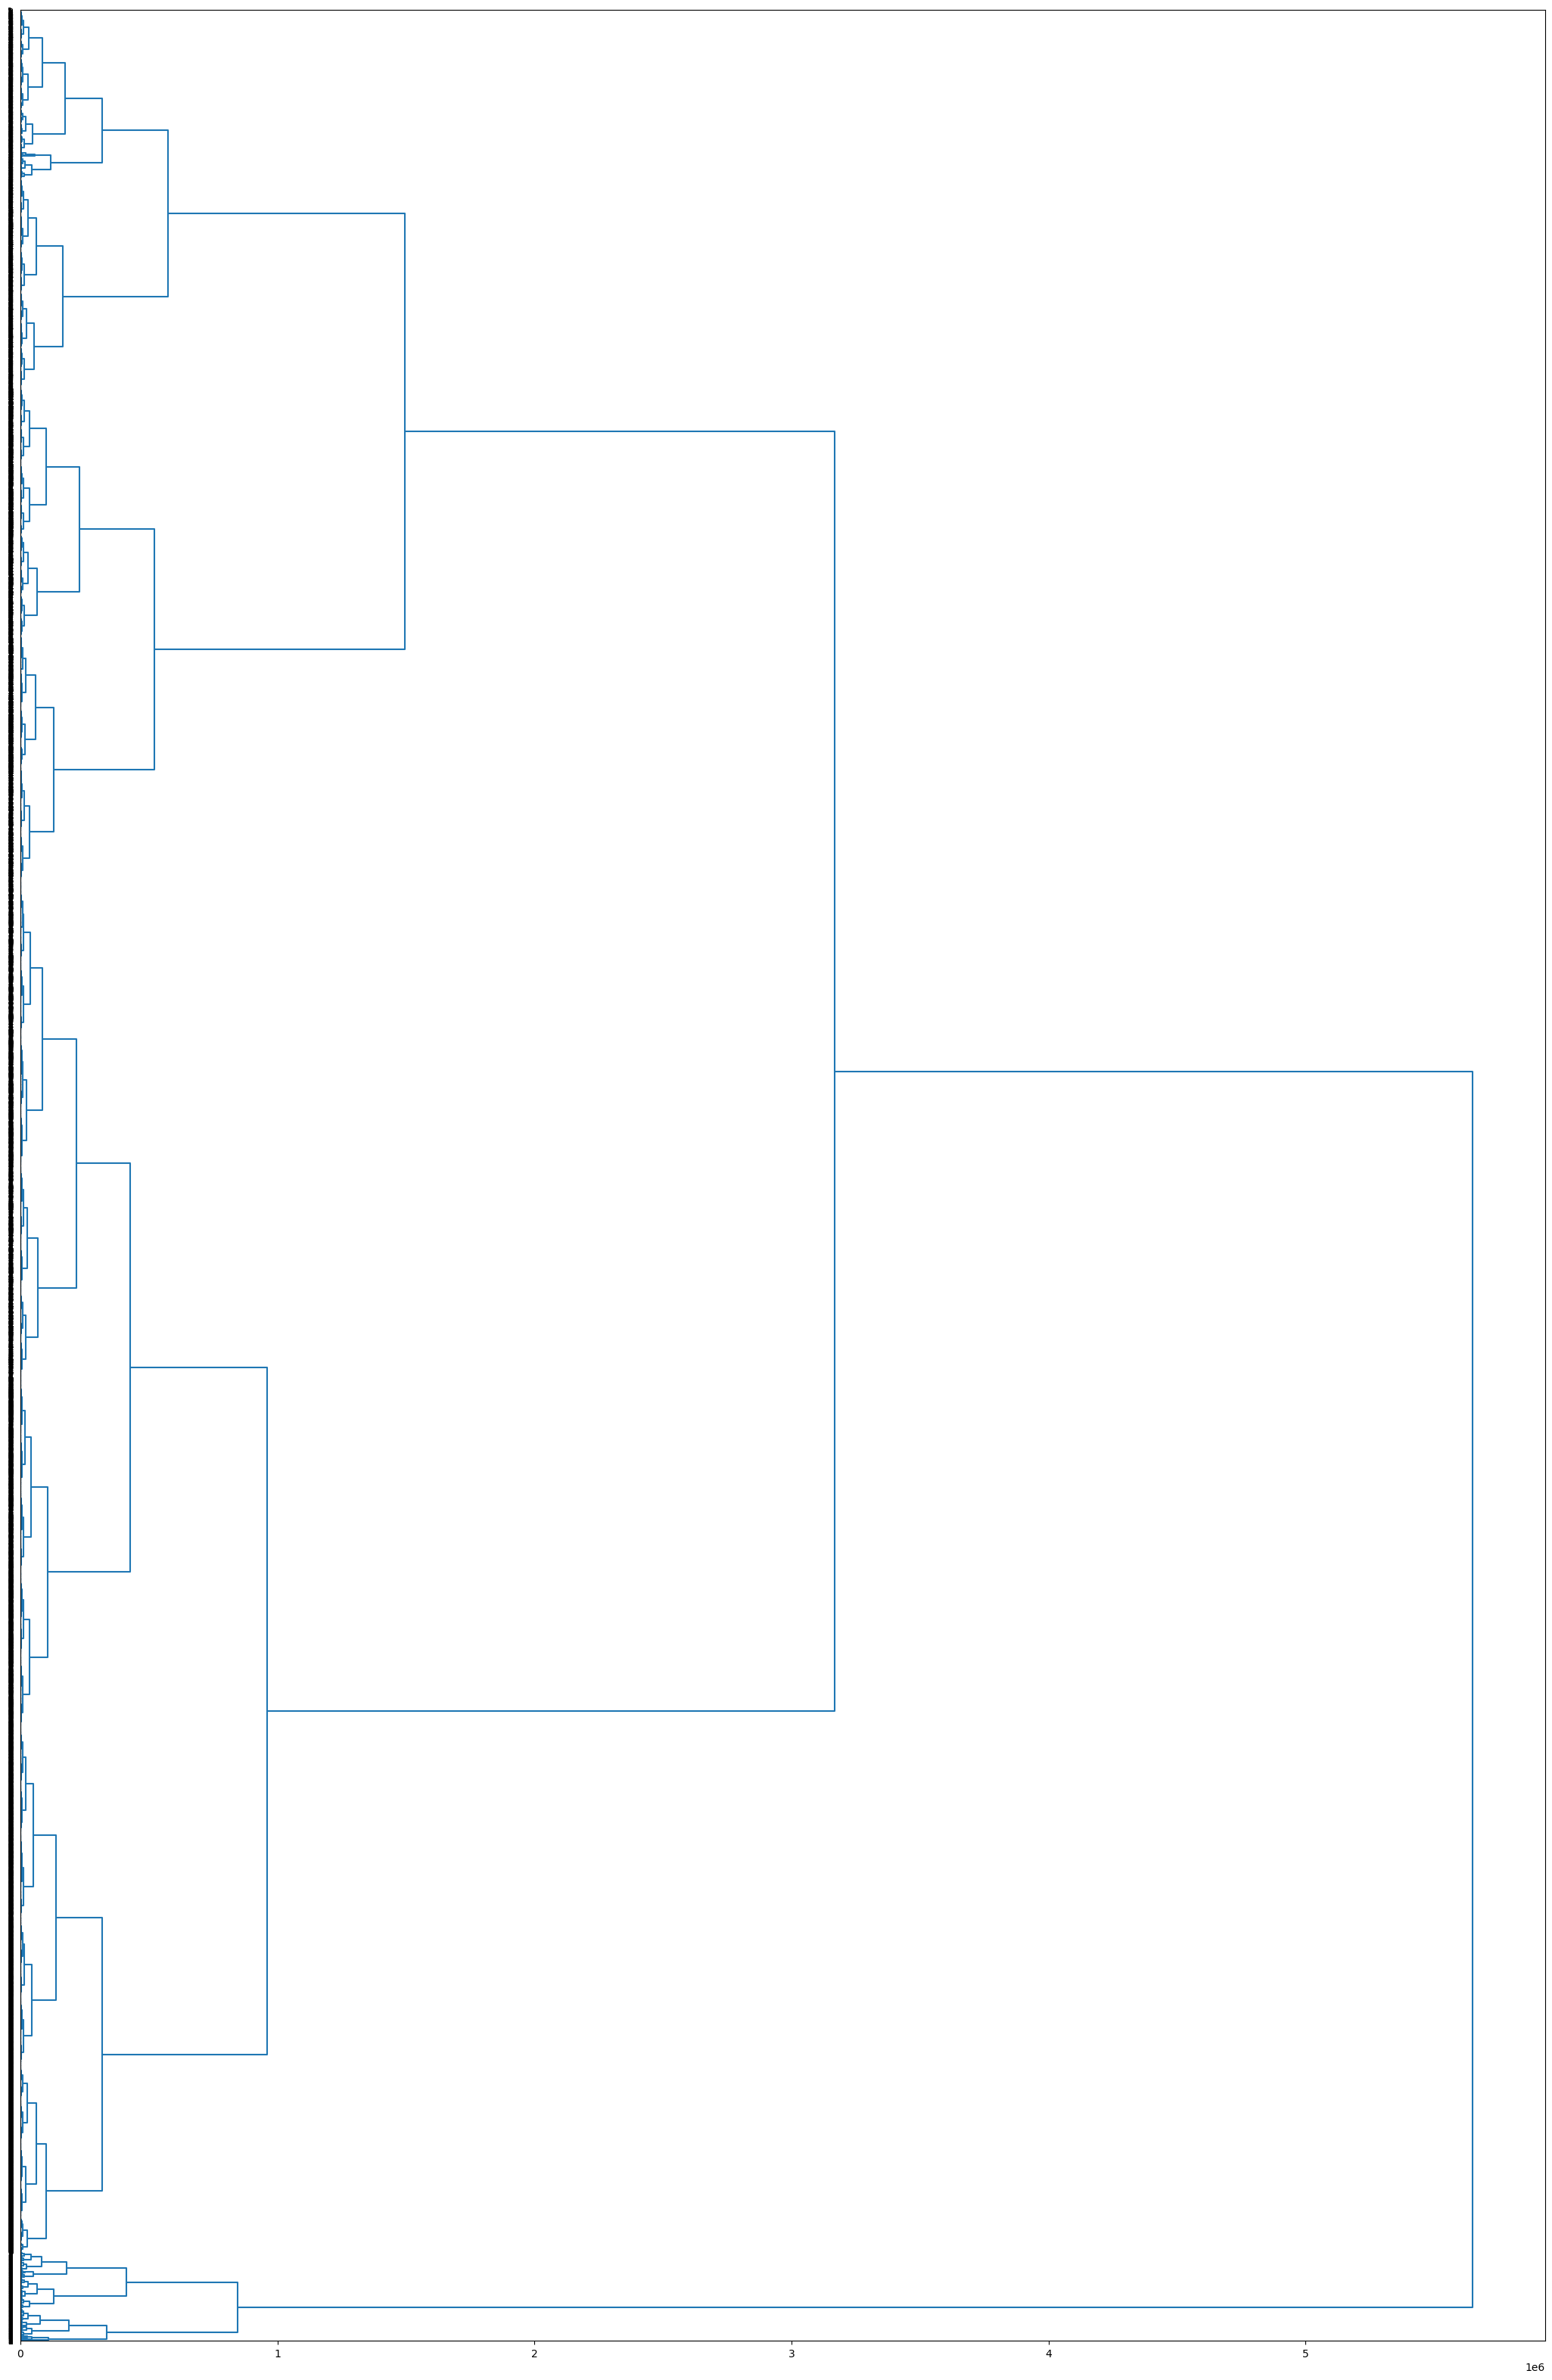

In [ ]:
samples = df.values
# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
plt.figure(figsize=(26, 40))
#dendrogram(mergings, labels=list(y), leaf_rotation=90, leaf_font_size=5, )
dendrogram(mergings, labels=list(y), color_threshold=1.5, orientation='right',
          leaf_font_size=8.)  # font size for the x axis labels
plt.show()

Данные формируют несколько четких кластеров, причем некоторые группы объединяются на значительных расстояниях, что говорит о наличии объе
ктов с высокой степенью отличия.

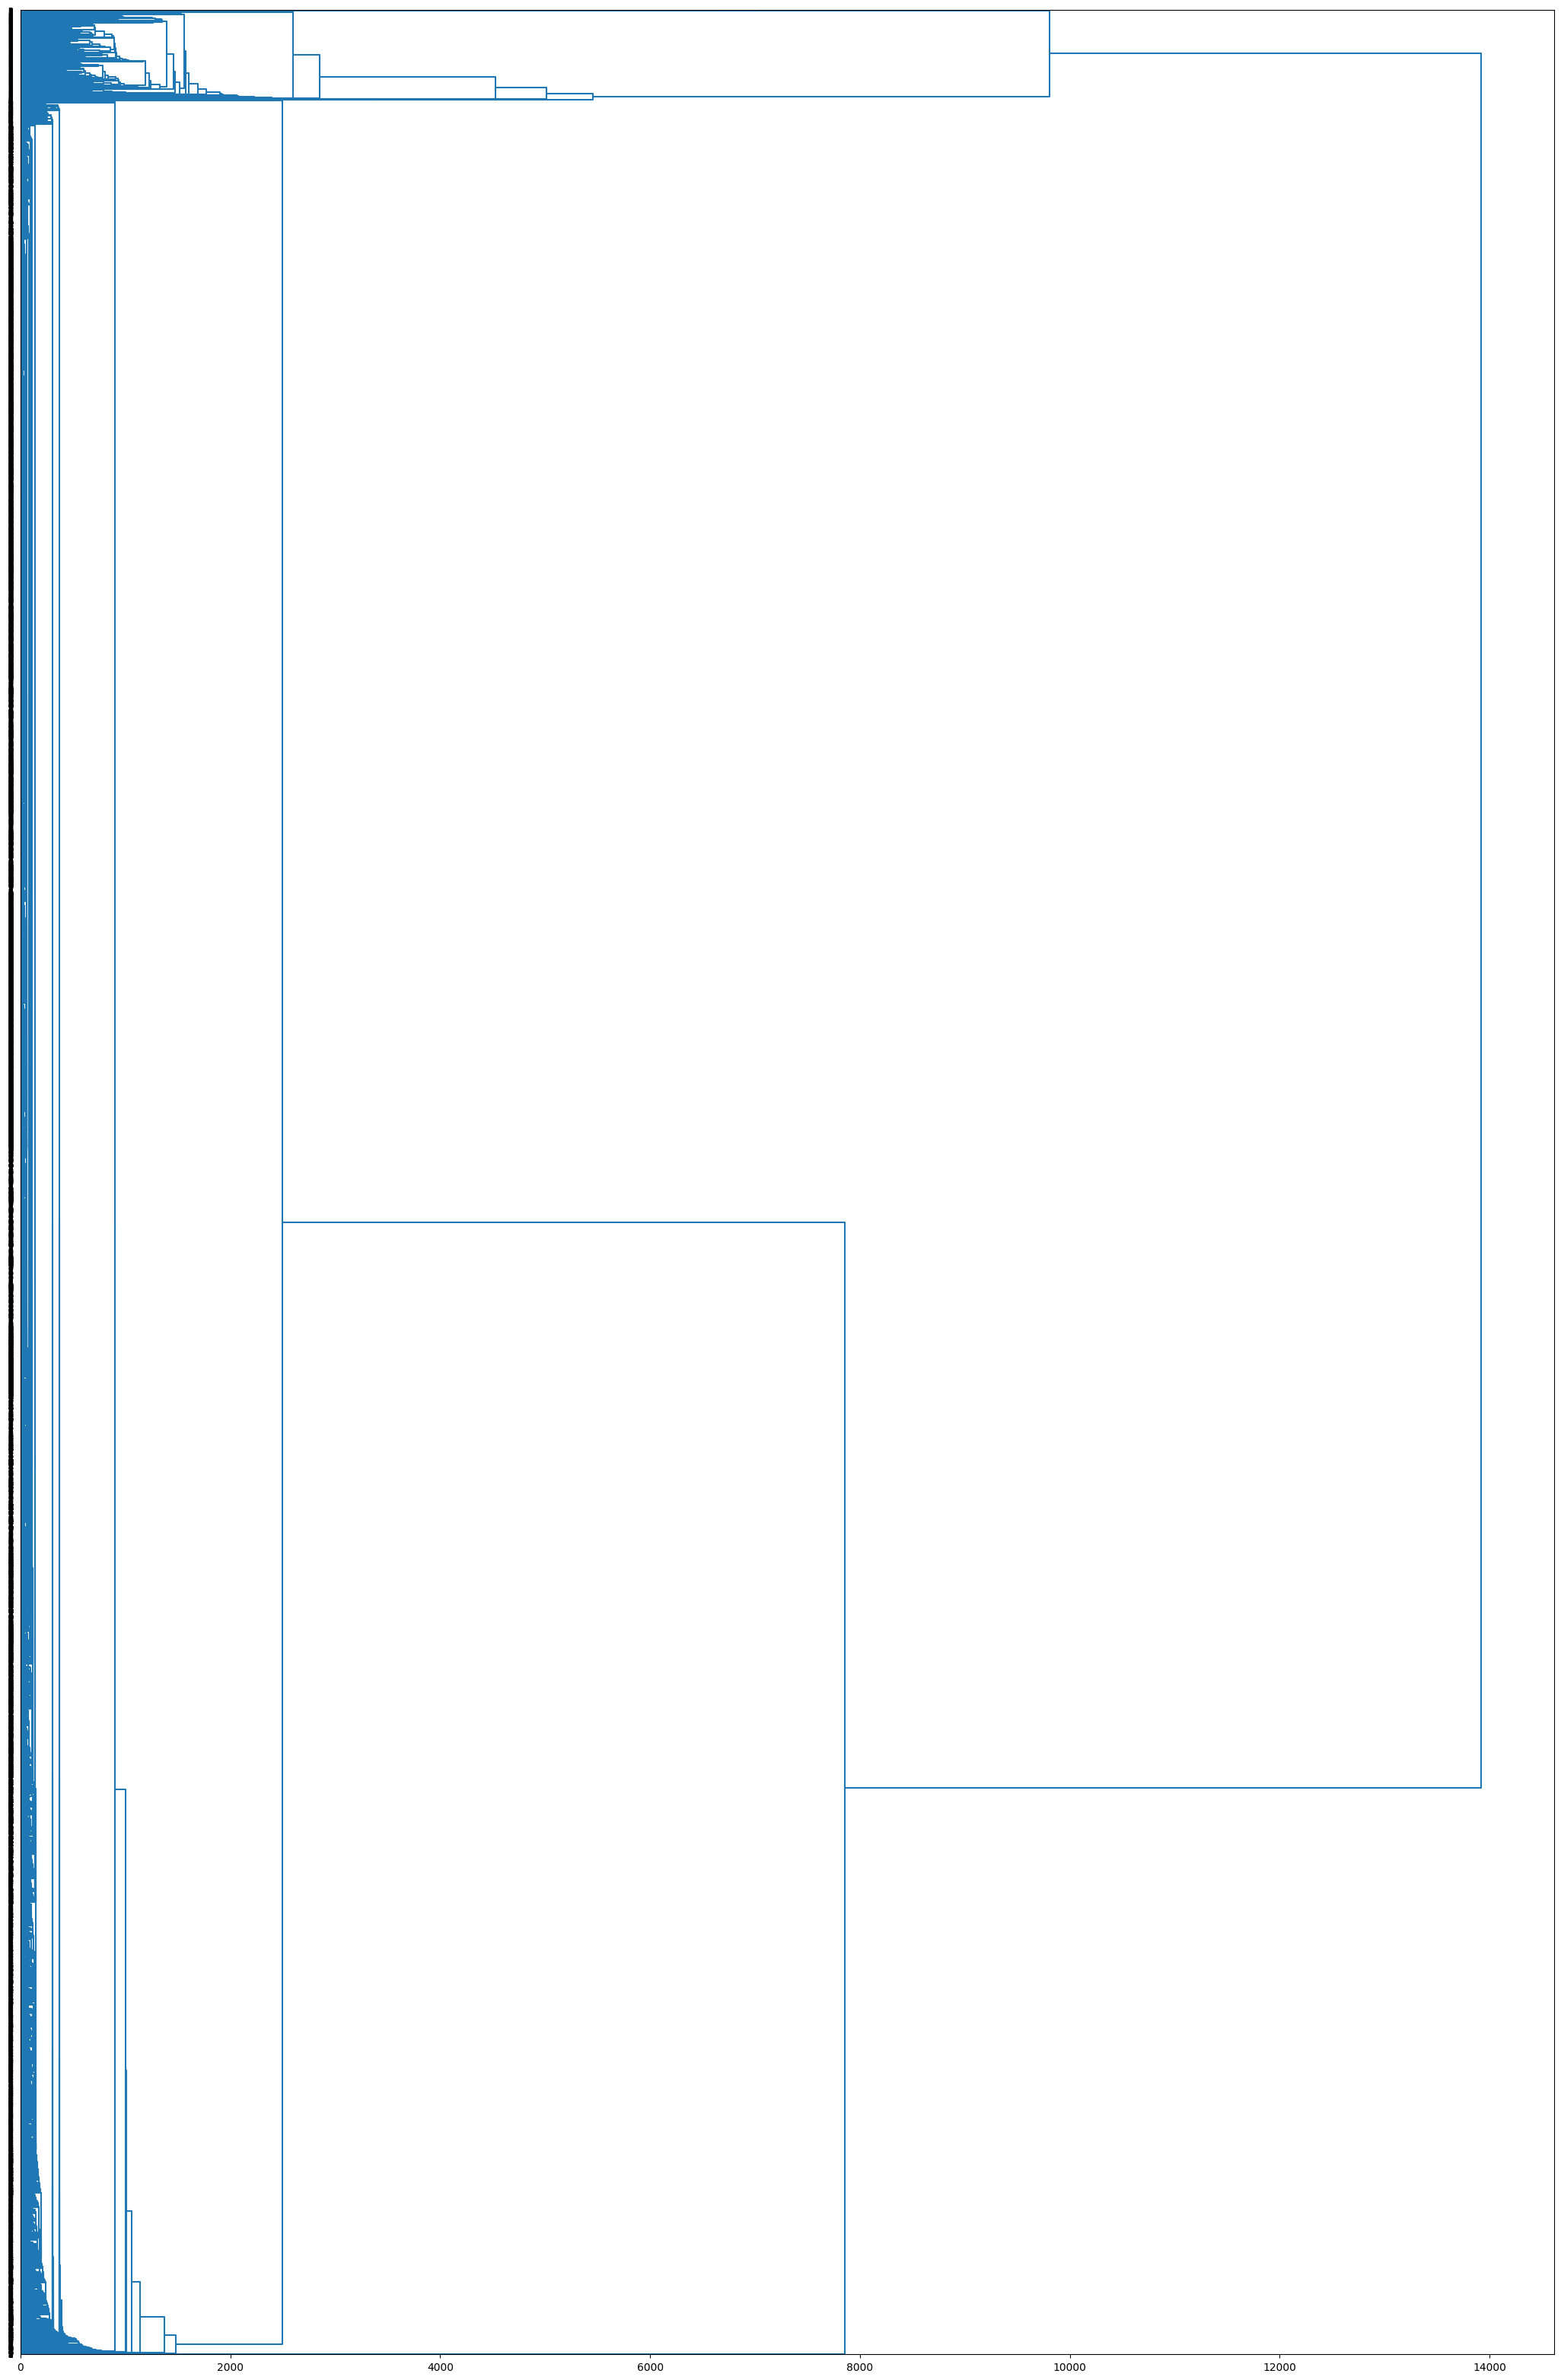

In [ ]:
import sys
sys.setrecursionlimit(1500)

samples = df.values
# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='single')
plt.figure(figsize=(26, 40))
dendrogram(mergings, labels=list(y), color_threshold=1.5, orientation='right',
          leaf_font_size=8.)  # font size for the x axis labels
plt.show()

#DBSCAN

In [ ]:
mins = X.shape[1]

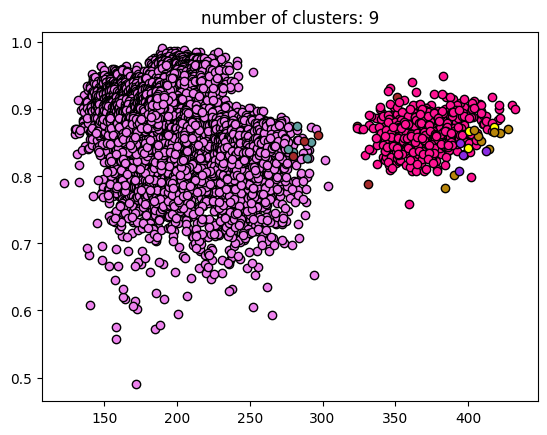

In [ ]:
db = DBSCAN(eps=2000, min_samples=3).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['violet', 'cadetblue', 'brown', 'deeppink', 'yellow', 'darkgoldenrod', 'blueviolet']
for k, col in zip(unique_labels, colors):
	if k == -1:
		col = 'k' # Black used for noise
	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["MinorAxisLength"], xy["Roundness"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["MinorAxisLength"], xy["Roundness"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

Обнаруживает 9 классов, но видно только 2.

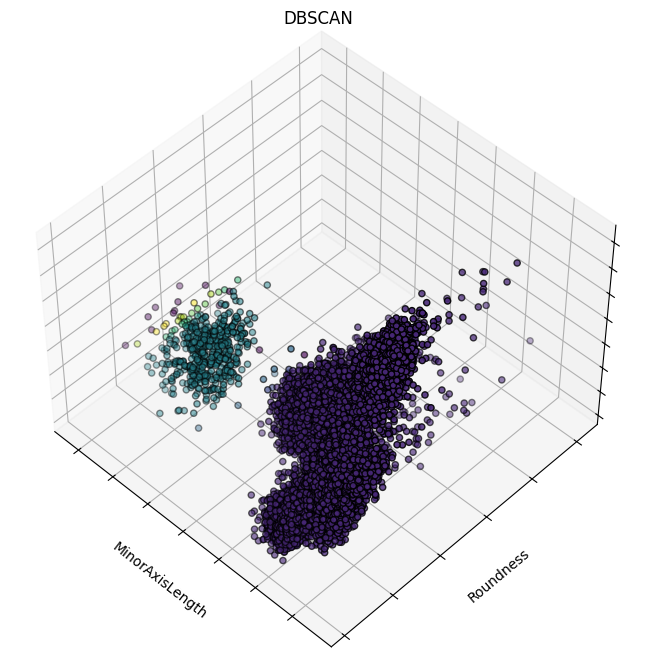

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["MinorAxisLength"], X["Roundness"], X["AspectRatio"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("MinorAxisLength")
ax.set_ylabel("Roundness")
ax.set_zlabel("AspectRatio")
ax.set_title("DBSCAN")

plt.show()

In [ ]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
#Оценка около 1 означает, что точка данных i очень компактна в пределах кластера, к которому она принадлежит, и удалена от других кластеров.
#Худшее значение — -1.
#Значения, близкие к 0, обозначают перекрывающиеся кластеры.
print("Оценка силуэта: %0.2f" % sc)
ari = adjusted_rand_score(y, labels)
#Больше 0,9 означает отличное кластерное восстановление, а выше 0,8 — хорошее восстановление.
#Менее 0,5 считается плохим восстановлением.
print("Оценка скорректированного рэнда: %0.2f" % ari)

Silhouette Coefficient: 0.66
Adjusted Rand Index: 0.03


Плохое восстановление.